# [OpenCV-Python Tutorial] Edge Detection

In this tutorial, we will find edges using Sobel operator(`cv2.Sobel()`) and Canny edge detector(`cv2.Canny()`).  

---

In [2]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

dtype: uint8
shape: (298, 299)


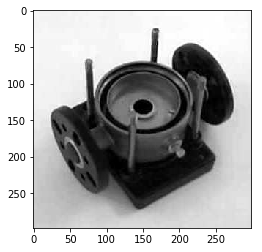

In [18]:
# Load an image into grayscale
input_image = cv2.imread('images/wheel.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
print('dtype: ' + str(input_image.dtype))
print('shape: ' + str(input_image.shape))

plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale

---

## 1. Edge detection with sobel operator

`dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)`

- `src`: input image
- `ddepth`: output image depth
- `dx`: order of the derivative x
- `dy`: order of the derivative y
- `ksize`: size of the extended Sobel kernel; it must be 1, 3, 5, or 7
- `scale`: optional scale factor for the computed derivative values

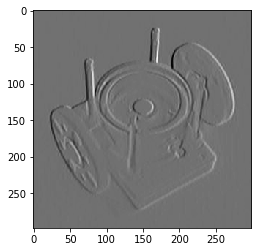

In [19]:
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # First-order derivative in x-direction
dy = 0  # NO derivative in y-direction
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

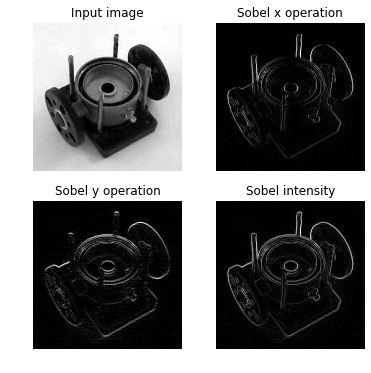

In [20]:
# sobel operations and its magnitudes
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(input_image, cv2.CV_64F, 0, 1)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

plt.figure(figsize=(6, 6));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_image, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobelx, 0.0), cmap='gray')
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray');
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray');

---

## 2. Canny Edge Detection

`edges = cv2.Canny(image, threshold1, threshold2, apatureSize=3, L2gradient=False)`

- `image`: 8-bit grayscale input image
- `threshold1`/`threshold2`: thresholds for the hysteresis procedure
- `apertureSize`: aperture size for the `Sobel()` operator
- `L2gradient`: A flag. `True` to use $L_2$-norm of gradients. $L_1$-norm for `False`

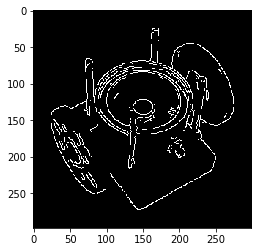

In [21]:
# Canny edge detection
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(input_image, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

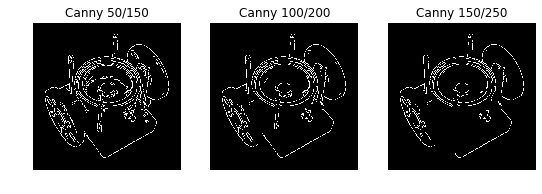

In [22]:
# Edge detections with the various thresholds
canny1 = cv2.Canny(input_image, 50, 150)
canny2 = cv2.Canny(input_image, 100, 200)
canny3 = cv2.Canny(input_image, 150, 250)

plt.figure(figsize=(9, 3));
plt.subplot(1, 3, 1); plt.title('Canny 50/150'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 150/250'); plt.axis('off');
plt.imshow(canny3, cmap='gray');

---

## Practice: Edge Detection

Find edges of the image below using **Canny edge detector**.
- Convert the input image into grayscale.
- You can choose appropriate values of the hysteresys thresholds.
- Set `cmap='gray'` when display using `plt.imshow()`.

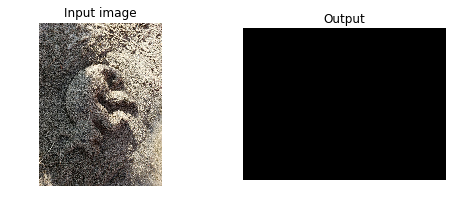

In [24]:
# Here's the input image
image = cv2.imread('images/sandy.jpg', cv2.IMREAD_COLOR)

# Write the code to find edges using cv2.Canny() method.
# ============ YOUR CODE HERE ============
output = np.zeros((360, 480), np.uint8)  # DUMMY
# ========================================

plt.figure(figsize=(8, 3));
plt.subplot(1, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');
# ======= DISPLAY YOUR OUTPUT HERE =======
plt.imshow(output, cmap='gray');  # DUMMY
# ========================================

---

### Reference

Please see the following official tutorials for more detailed explanation.

 - [Image Gradients — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html)
 - [Canny Edge Detection — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_canny/py_canny.html)